In [9]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from numpy.fft import fft2, ifft2
from aux import gkern

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Explicar convolução e modelo de borramento gaussiano

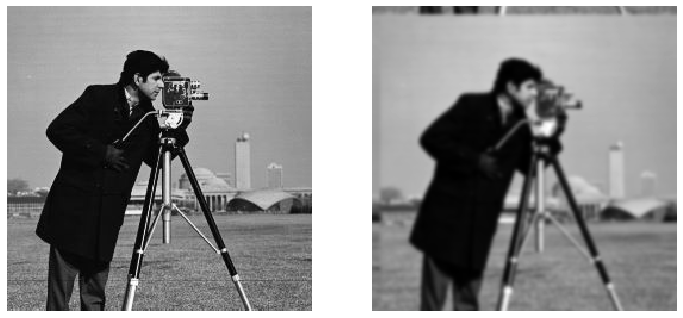

In [43]:
img_real = imread('cameraman.jpg').mean(-1)
img_real /= img_real.max()
kern = gkern(15,5)
img_obs = ifft2(fft2(img_real)*fft2(kern, img_real.shape)).real + 1e-15*np.random.randn(*img_real.shape)
img_invfilt = ifft2(fft2(img_obs)/fft2(kern, img_obs.shape)).real

fig, ax = plt.subplots(1, 2, figsize=(12,12))
ax[0].imshow(img_real, cmap='gray')
ax[0].axis('off')
ax[1].imshow(img_obs, cmap='gray')
ax[1].axis('off')
plt.show()

Explicar Inverse Filtering

In [44]:
def g(x,y):
    kern = gkern(15,x)
    img_obs = ifft2(fft2(img_real)*fft2(kern, img_real.shape)).real + (10**y)*np.random.randn(*img_real.shape)
    img_invfilt = ifft2(fft2(img_obs)/fft2(kern, img_obs.shape)).real
    
    fig, ax = plt.subplots(1, 2, figsize=(15,15))
    ax[0].imshow(img_obs, cmap='gray'), ax[0].axis('off')
    ax[1].imshow(img_invfilt, cmap='gray'), ax[0].axis('off')
    plt.show()

interactive_plot = interactive(g, x=widgets.IntSlider(min=1, max=5, step=1),
                               y=widgets.IntSlider(min=-9, max=-1, step=1, value=-9))
interactive_plot

interactive(children=(IntSlider(value=1, description='x', max=5, min=1), IntSlider(value=-9, description='y', …

Explicar Wiener Filtering

In [ ]:
def g(x,y):
    kern = gkern(15,x)
    img_obs = ifft2(fft2(img_real)*fft2(kern, img_real.shape)).real + (10**y)*np.random.randn(*img_real.shape)
    img_invfilt = ifft2(fft2(img_obs)/fft2(kern, img_obs.shape)).real
    
    fig, ax = plt.subplots(1, 3, figsize=(15,15))
    ax[0].imshow(img_obs, cmap='gray'), ax[0].axis('off')
    ax[1].imshow(img_invfilt, cmap='gray'), ax[0].axis('off')
    plt.show()

interactive_plot = interactive(g, x=widgets.IntSlider(min=1, max=5, step=1),
                               y=widgets.IntSlider(min=-9, max=-1, step=1, value=-9))
interactive_plot